In [0]:
#Training project from samsung research Russia

In [0]:
import torch
import random
import numpy as np

#pseudorandom 
#for reproducibility of experiments
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
#download MNIST-dataset
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

0it [00:00, ?it/s]

9920512it [00:01, 8382208.45it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 124963.02it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 2061164.11it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


8192it [00:00, 47431.34it/s]            


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [4]:
#separation of test and train
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [0]:
#we want data to be float
X_train = X_train.float()
X_test = X_test.float()


In [7]:
X_train.dtype, y_train.dtype

(torch.float32, torch.int64)

In [8]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [9]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

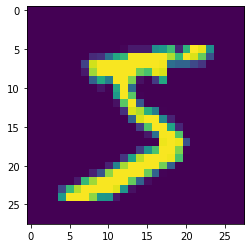

tensor(5)


In [10]:

import matplotlib.pyplot as plt
#show first image
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [0]:
#making vector from picture to load into fully-connected nn
#2D arrays
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [0]:

class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [43]:
torch.cuda.is_available()

True

In [44]:
#is there any calculations on the gpu?
!nvidia-smi

Fri Dec 13 16:28:21 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    34W / 250W |    913MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#send model and data to gpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#we can send model to gpu because it is inherited from torch.nn.module
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

In [0]:
#CrossEntropyLoss is used in classification
loss = torch.nn.CrossEntropyLoss()
#we optimise the values of neurons
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [47]:

batch_size = 100

test_accuracy_history = []
test_loss_history = []
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(30):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9040, device='cuda:0')
tensor(0.9104, device='cuda:0')
tensor(0.9197, device='cuda:0')
tensor(0.9197, device='cuda:0')
tensor(0.9219, device='cuda:0')
tensor(0.9217, device='cuda:0')
tensor(0.9296, device='cuda:0')
tensor(0.9298, device='cuda:0')
tensor(0.9334, device='cuda:0')
tensor(0.9330, device='cuda:0')
tensor(0.9280, device='cuda:0')
tensor(0.9312, device='cuda:0')
tensor(0.9297, device='cuda:0')
tensor(0.9274, device='cuda:0')
tensor(0.9337, device='cuda:0')
tensor(0.9392, device='cuda:0')
tensor(0.9368, device='cuda:0')
tensor(0.9418, device='cuda:0')
tensor(0.9372, device='cuda:0')
tensor(0.9322, device='cuda:0')
tensor(0.9378, device='cuda:0')
tensor(0.9362, device='cuda:0')
tensor(0.9391, device='cuda:0')
tensor(0.9432, device='cuda:0')
tensor(0.9397, device='cuda:0')
tensor(0.9438, device='cuda:0')
tensor(0.9444, device='cuda:0')
tensor(0.9436, device='cuda:0')
tensor(0.9445, device='cuda:0')
tensor(0.9426, device='cuda:0')


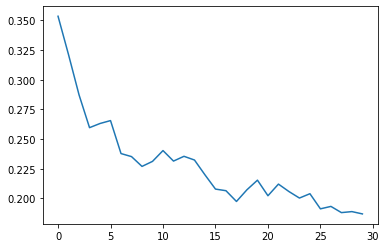

In [48]:

#plt.plot(test_accuracy_history)
plt.plot(test_loss_history)